# t-sne

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [ ]:
X.shape

In [ ]:
pd.DataFrame(X).head()

In [2]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [ ]:
X_2d = tsne.fit_transform(X)

In [ ]:
mydata=pd.DataFrame(X_2d,columns=['X','Y'])

In [ ]:
mydata['digits']=y

In [ ]:
# mydata

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
sns.lmplot('X','Y',hue='digits',data=mydata,fit_reg=False)

# tsne on wine data

In [3]:
wine=pd.read_csv(r'/Users/lalitsachan/Dropbox/0.0 Data/winequality-white.csv',sep=";")

In [4]:
wine.shape

(4898, 12)

In [5]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
X=scale(wine.iloc[:,:-1])


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
for k in range(2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    
    print(k,silhouette_score(X,kmeans.labels_))

2 0.2143901587128857
3 0.14466254062829698
4 0.15903367168849825
5 0.14378826525880925
6 0.14641836698125726
7 0.12593342154432505
8 0.12823487492051336
9 0.1284212769424741


In [9]:
kmeans=KMeans(n_clusters=3)

In [10]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [11]:
X_2d=tsne.fit_transform(X)

In [12]:
mydata=pd.DataFrame(X_2d,columns=['X','Y'])

In [13]:
mydata['cluster']=kmeans.labels_

In [15]:
import seaborn as sns

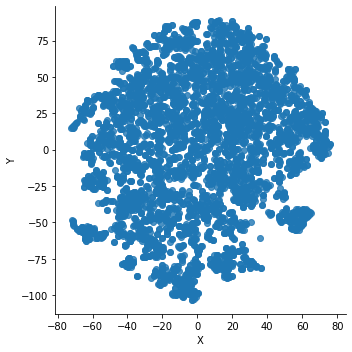

In [16]:
sns.lmplot('X','Y',data=mydata,fit_reg=False)

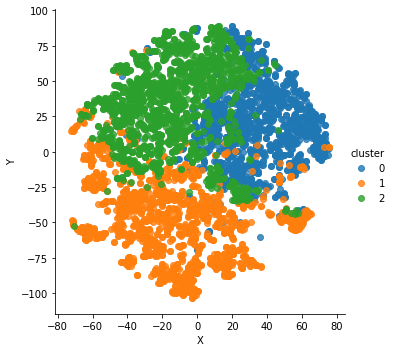

In [17]:
sns.lmplot('X','Y',hue='cluster',data=mydata,fit_reg=False)

# PCA

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [ ]:
file=r'/Users/lalitsachan/Dropbox/PDS V3/Data/rg_train.csv'

In [ ]:
bd=pd.read_csv(file)

In [ ]:
bd.head()

In [ ]:
bd=bd.select_dtypes(exclude=['object'])
bd.drop(['REF_NO','year_last_moved','Revenue.Grid'],1,inplace=True)

In [ ]:
bd.columns

In [ ]:
bd.shape

In [ ]:
bd.corr()

In [ ]:
import seaborn as sns
%matplotlib inline

In [ ]:
sns.heatmap(bd.corr())

In [ ]:
bd.shape

In [ ]:
X=bd.copy()
X = scale(X)
pca = PCA(n_components=15)

pca.fit(X)
pca.components_.shape

In [ ]:
var= np.round(pca.explained_variance_ratio_,3)

print(var)

In [ ]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

print(var1)

In [ ]:
pca = PCA(n_components=11)
pca.fit(X)
pca.components_.shape

In [ ]:
X.shape

In [ ]:
X1=pd.DataFrame(pca.transform(X))

In [ ]:
X1.shape

In [ ]:
X1.head()

### individual pc loadings

In [ ]:
# pc1
loadings=pca.components_[0]
# loadings

In [ ]:
list(zip(bd.columns,loadings))

In [ ]:
sns.heatmap(X1.corr())